# ** Projeto de Doenças Cardiovasculares - Regressão Logística**


age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

ImportError: cannot import name '_setdiff1d' from 'sklearn.utils._array_api' (C:\Users\cleit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py)

In [3]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [13]:
base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


In [7]:
#Tratando os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [9]:
base['weight'] = base['weight'].str.replace(',','.').astype(float).astype(int)

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             10000 non-null  int64
 1   gender          10000 non-null  int64
 2   height          10000 non-null  int64
 3   weight          10000 non-null  int32
 4   cholesterol     10000 non-null  int64
 5   gluc            10000 non-null  int64
 6   smoke           10000 non-null  int64
 7   alco            10000 non-null  int64
 8   active          10000 non-null  int64
 9   cardio_disease  10000 non-null  int64
dtypes: int32(1), int64(9)
memory usage: 742.3 KB


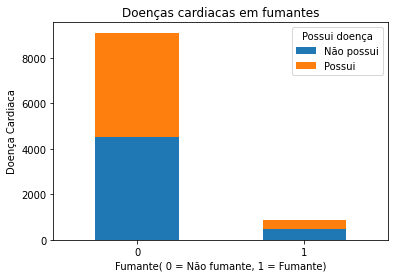

In [21]:
#análise exploratória dos dados
contagem = pd.crosstab(base['smoke'], base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Doenças cardiacas em fumantes')
plt.xlabel('Fumante( 0 = Não fumante, 1 = Fumante)')
plt.ylabel('Doença Cardiaca')
plt.legend(title='Possui doença', labels=['Não possui', 'Possui'])
plt.xticks(rotation=0)
plt.show()

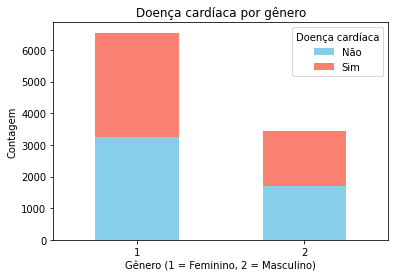

In [17]:
contagem_genero = pd.crosstab(base['gender'], base['cardio_disease'])
contagem_genero.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Doença cardíaca por gênero')
plt.xlabel('Gênero (1 = Feminino, 2 = Masculino)')
plt.ylabel('Contagem')
plt.legend(title='Doença cardíaca', labels=['Não', 'Sim'])
plt.xticks(rotation=0)
plt.show()

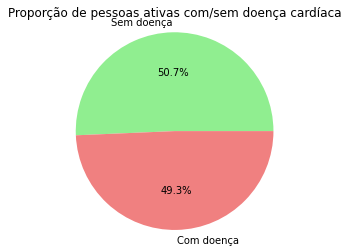

In [23]:
ativos = base[base['active'] == 1]['cardio_disease'].value_counts()

plt.pie(ativos, labels=['Sem doença', 'Com doença'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Proporção de pessoas ativas com/sem doença cardíaca')
plt.axis('equal')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

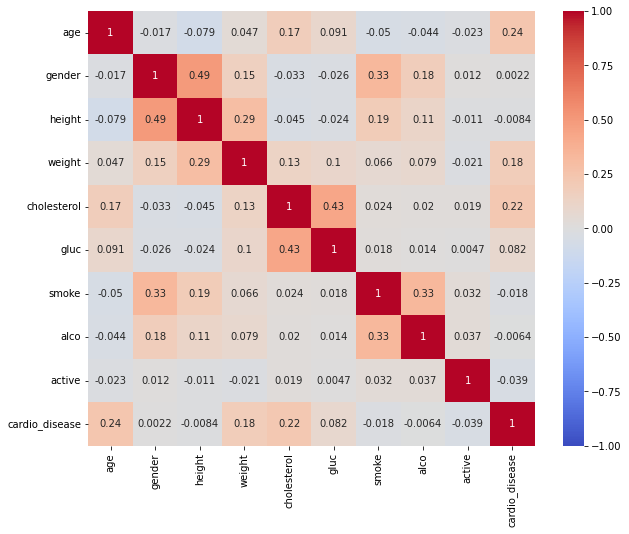

In [27]:
# levantando matriz de correlação
correlation_matrix = base.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.tittle('Matriz de Correlação')
plt.show()

In [ ]:
# É notorio que as que mais se correlacionam com a doença cardiaca são respectivamente Idade, Colesterol e Peso. Essas três estatísticas são as que mais interferem na condição de doenças cardiacas de acordo com nossa matriz de correlação.
#Tirando o foco de doenças cardiocas, a colesterol e a glicose tem uma alta correlação também.
#notorio também que quem realiza atividades físicas tem uma correlação negativa, ou seja menos chance de possuir doenças.

In [31]:

X = base.drop('cardio_disease', axis=1) #Separando as bases
Y = base['cardio_disease']

In [29]:

base['cardio_disease'].value_counts() #verificando balanceamento

cardio_disease
1    5031
0    4969
Name: count, dtype: int64

In [33]:
#Separando as bases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
# padronizando os dados das bases
sc = StandardScaler()

#Primeiro ajustando os dados de treino
X_train = sc.fit_transform(X_train)

#Agora os dados de teste
X_test = sc.transform(X_test)

In [37]:
# balabceando as bases
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

In [39]:

X_train_balanced

array([[ 0.10037973, -0.73138185, -1.25610705, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-0.19393504,  1.36727483,  0.08809078, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 1.4247962 , -0.73138185, -0.27850863, ..., -0.31328402,
        -0.24037742, -1.96927621],
       ...,
       [ 0.98332404,  1.36727483,  0.65429181, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-1.92199261,  1.36727483,  1.88967284, ...,  3.19199173,
        -0.24037742,  0.50780078],
       [-1.07687935, -0.73138185,  0.84528083, ..., -0.31328402,
        -0.24037742,  0.50780078]])

In [41]:
Y_train_balanced

0       0
1       0
2       1
3       1
4       0
       ..
8059    0
8060    0
8061    0
8062    0
8063    0
Name: cardio_disease, Length: 8064, dtype: int64

In [43]:
X_test

array([[-0.63540719, -0.73138185, -0.03410902, ..., -0.31328402,
        -0.24037742, -1.96927621],
       [ 0.10037973,  1.36727483,  1.43228861, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 0.10037973, -0.73138185, -0.76730784, ..., -0.31328402,
        -0.24037742,  0.50780078],
       ...,
       [-1.66550889, -0.73138185,  0.6990898 , ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-0.48824981, -0.73138185,  0.45469019, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 1.27763881,  1.36727483, -0.03410902, ..., -0.31328402,
        -0.24037742,  0.50780078]])

In [45]:
Y_test

6252    0
4684    0
1731    1
4742    0
4521    1
       ..
6412    1
8285    1
7853    0
1095    1
6929    0
Name: cardio_disease, Length: 2000, dtype: int64

In [47]:
logistic_cardio = LogisticRegression(random_state = 0)

In [49]:
logistic_cardio.fit(X_train_balanced, Y_train_balanced)

LogisticRegression(random_state=0)

In [53]:

logistic_cardio.intercept_

array([0.01460724])

In [55]:
logistic_cardio.coef_

array([[ 0.44158445,  0.00855567, -0.07881951,  0.35125717,  0.40809337,
        -0.07365316, -0.02777308, -0.00863097, -0.07132337]])

In [57]:
#inicio do teste do modelo
Y_pred_test = logistic_cardio.predict(X_test)

In [61]:
relatorio = classification_report(Y_test, Y_pred_test)
print("Relatório de classificação:")
print(relatorio)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1001
           1       0.67      0.61      0.64       999

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



In [63]:
previsoes = logistic_cardio.predict(X_train_balanced)

In [65]:
relatorio2 = classification_report(Y_train_balanced, previsoes)
print("Relatório de Classificação:")
print(relatorio2)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      4032
           1       0.64      0.61      0.62      4032

    accuracy                           0.63      8064
   macro avg       0.64      0.63      0.63      8064
weighted avg       0.64      0.63      0.63      8064



In [67]:

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

roc_auc = roc_auc_score(Y_test, Y_pred_test)
print("AUC: {:.2f}".format(roc_auc))


AUC: 0.66


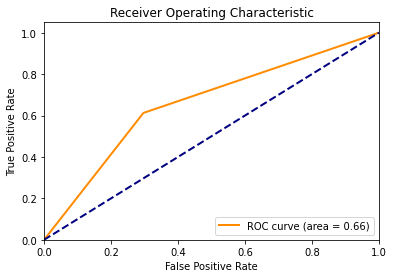

In [69]:
#curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()